In [48]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [49]:
df = pd.read_csv('dengue.csv')
print(df.shape)
df.head()

(48, 6)


,Year,Month,Temp 0C,Rainfall (mm),Humidity (%),Dengue Victims
0,2016,1,27,33.74,74,2184
1,2016,2,28,33.92,73,1569
2,2016,3,28,41.27,74,1016
3,2016,4,29,101.74,77,942
4,2016,5,28,655.50,83,693


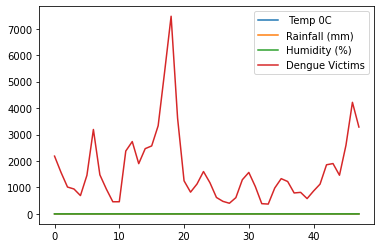

In [65]:
from matplotlib import pyplot
df[[' Temp 0C', 'Rainfall (mm)', 'Humidity (%)', 'Dengue Victims']].plot()
pyplot.show()

In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,48.0,2017.500000,1.129865,2016.00,2016.750,2017.500,2018.250,2019.0
Month,48.0,6.500000,3.488583,1.00,3.750,6.500,9.250,12.0
Temp 0C,48.0,27.375000,0.959277,26.00,27.000,27.000,28.000,30.0
Rainfall (mm),48.0,269.475625,234.719722,15.36,95.705,197.795,358.275,954.0
Humidity (%),48.0,80.604167,3.818987,72.00,78.750,81.000,84.000,86.0
Dengue Victims,48.0,1708.687500,1384.485543,372.00,821.000,1271.500,2232.250,7471.0


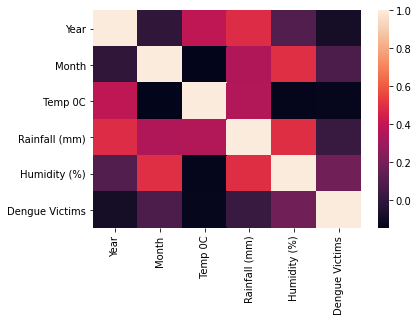

In [52]:
#Plotting the correlation between variables
import seaborn as sns
import matplotlib as plt
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [53]:
# Creating Arrays for the Features and the Response Variable
target_column = ['Dengue Victims'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,48.0,0.999257,0.000560,0.998514,0.998886,0.999257,0.999629,1.0
Month,48.0,0.541667,0.290715,0.083333,0.312500,0.541667,0.770833,1.0
Temp 0C,48.0,0.912500,0.031976,0.866667,0.900000,0.900000,0.933333,1.0
Rainfall (mm),48.0,0.282469,0.246037,0.016101,0.100320,0.207332,0.375550,1.0
Humidity (%),48.0,0.937258,0.044407,0.837209,0.915698,0.941860,0.976744,1.0
Dengue Victims,48.0,1708.687500,1384.485543,372.000000,821.000000,1271.500000,2232.250000,7471.0


In [54]:
# Creating the Training and Test Datasets
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(33, 5)
(15, 5)


In [55]:
# Scale the data
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [56]:
# Instantiates the model with the hidden_layer_sizes
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [66]:
# Predict the target values of the reserved test dataset
y_pred=reg.predict(X_testscaled)
pred=reg.predict(X_trainscaled)
score = r2_score(y_pred, y_test)
print('R2 Score: %.2f' % (score))
testScore = np.sqrt(mean_squared_error(y_pred, y_test))
trainScore = np.sqrt(mean_squared_error(pred, y_train))
print('Train Score: %.2f RMSE' % (trainScore))
print('Test Score: %.2f RMSE' % (testScore))

R2 Score: -2.11
Train Score: 56.13 RMSE
Test Score: 1582.78 RMSE
